# Ackley

## ZO-SGD

In [1]:
import torch  
import torch.nn as nn  
import torch.optim as optim  
from torchvision import datasets, transforms  
from tqdm import tqdm
import torch.nn.functional as F
from math import *
import numpy as np
def setup_seed(seed):
     torch.manual_seed(seed)
     torch.cuda.manual_seed_all(seed)
     torch.backends.cudnn.deterministic = True
setup_seed(20)
x_sgd = []
y_sgd = []
def ackley(param, a=20, b=0.2, c=2 * np.pi):  
    x, y = param[0], param[1]
    term1 = -a * torch.exp(-b * torch.sqrt((x**2 + y**2)/2))  
    term2 = -torch.exp((torch.cos(c*x) + torch.cos(c*y))/2)  
    return term1 + term2 + a + torch.exp(torch.tensor([1]))
def zeroth_order_optimize(num_iterations, mu=1, lr=0.01):  
    param = torch.tensor([-0.3, -0.3])
    for epoch in range(1, num_iterations + 1):  
        x_sgd.append(param[0].item())
        y_sgd.append(param[1].item())
        loss_list = []
        lr = lr / epoch
        grad_estimates = {}  
        outputs_origin = ackley(param)
        print("Epoch ",epoch,":",outputs_origin.item()
        for i in range(100):
            u = torch.randn(2)
            u_norm = torch.norm(u)
            u = u / u_norm
            grad_estimate = torch.zeros_like(param)
            param_plus = param.clone()
            param_plus += u.view(param_plus.shape) * mu
            outputs_plus = ackley(param_plus)
            grad_i = (outputs_plus - outputs_origin)
            grad_estimate += grad_i * u.view(grad_estimate.shape)
        grad_estimates = (grad_estimate * 2 / 100 / mu)
        param -= lr * grad_estimates  
        mu /= 2
        
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")    
num_iterations = 100
zeroth_order_optimize(num_iterations, mu=0.1, lr=2)

3.1488218307495117
2.3716249465942383
2.076603889465332
1.9278669357299805
1.8659143447875977
1.8658761978149414
1.8648309707641602
1.864680290222168
1.864628791809082
1.864628791809082
1.864628791809082
1.864628791809082
1.864628791809082
1.864628791809082
1.864628791809082
1.864628791809082
1.864628791809082
1.864628791809082
1.864628791809082
1.864628791809082
1.864628791809082
1.864628791809082
1.864628791809082
1.864628791809082
1.864628791809082
1.864628791809082
1.864628791809082
1.864628791809082
1.864628791809082
1.864628791809082
1.864628791809082
1.864628791809082
1.864628791809082
1.864628791809082
1.864628791809082
1.864628791809082
1.864628791809082
1.864628791809082
1.864628791809082
1.864628791809082
1.864628791809082
1.864628791809082
1.864628791809082
1.864628791809082
1.864628791809082
1.864628791809082
1.864628791809082
1.864628791809082
1.864628791809082
1.864628791809082
1.864628791809082
1.864628791809082
1.864628791809082
1.864628791809082
1.864628791809082
1.86

## ZO-AdaGrad

In [2]:
import torch  
import torch.nn as nn  
import torch.optim as optim  
from torchvision import datasets, transforms  
from tqdm import tqdm
import torch.nn.functional as F
from math import *
def setup_seed(seed):
     torch.manual_seed(seed)
     torch.cuda.manual_seed_all(seed)
     torch.backends.cudnn.deterministic = True
setup_seed(20)
x_ada = []
y_ada = []
def ackley(param, a=20, b=0.2, c=2 * np.pi):  
    x, y = param[0], param[1]
    term1 = -a * torch.exp(-b * torch.sqrt((x**2 + y**2)/2))  
    term2 = -torch.exp((torch.cos(c*x) + torch.cos(c*y))/2)  
    return term1 + term2 + a + torch.exp(torch.tensor([1]))
def zeroth_order_optimize(num_iterations, mu=1, lr=0.01):  
    param = torch.tensor([-0.3,-0.3])
    g = 0
    b = 300
    for epoch in range(1, num_iterations + 1):  
        x_ada.append(param[0].item())
        y_ada.append(param[1].item())
        loss_list = []
        lr = lr / epoch
        grad_estimates = {}  
        outputs_origin = ackley(param)
        print("Epoch ",epoch,":",outputs_origin.item())
        for i in range(100):
            u = torch.randn(2)
            u_norm = torch.norm(u)
            u = u / u_norm
            grad_estimate = torch.zeros_like(param)
            param_plus = param.clone()
            param_plus += u.view(param_plus.shape) * mu
            outputs_plus = ackley(param_plus)
            grad_i = (outputs_plus - outputs_origin)
            grad_estimate += grad_i * u.view(grad_estimate.shape)
        grad_estimates = (grad_estimate * 2 / 100 / mu)
        param -= 5 / sqrt(b + g) * grad_estimates
        g += torch.pow(torch.norm(grad_estimates),2)
        mu /= 2
    print(param)
        
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")    
num_iterations = 100
zeroth_order_optimize(num_iterations, mu=1, lr=1)

Epoch  1 : 3.1488218307495117
Epoch  2 : 3.1685667037963867
Epoch  3 : 3.12203311920166
Epoch  4 : 2.8654909133911133
Epoch  5 : 2.645848274230957
Epoch  6 : 2.522942543029785
Epoch  7 : 2.5205774307250977
Epoch  8 : 2.517886161804199
Epoch  9 : 2.2129087448120117
Epoch  10 : 2.0213327407836914
Epoch  11 : 1.7745351791381836
Epoch  12 : 1.7034730911254883
Epoch  13 : 1.5171327590942383
Epoch  14 : 1.0727167129516602
Epoch  15 : 0.7926416397094727
Epoch  16 : 0.7032346725463867
Epoch  17 : 0.5563020706176758
Epoch  18 : 0.49484920501708984
Epoch  19 : 0.4710721969604492
Epoch  20 : 0.2616720199584961
Epoch  21 : 0.10827350616455078
Epoch  22 : 0.02440166473388672
Epoch  23 : 0.02440166473388672
Epoch  24 : 0.02440166473388672
Epoch  25 : 0.02440166473388672
Epoch  26 : 0.02440166473388672
Epoch  27 : 0.02440166473388672
Epoch  28 : 0.02440166473388672
Epoch  29 : 0.02440166473388672
Epoch  30 : 0.02440166473388672
Epoch  31 : 0.02440166473388672
Epoch  32 : 0.02440166473388672
Epoch  33

## ZO-AdaHB

In [3]:
import torch  
import torch.nn as nn  
import torch.optim as optim  
from torchvision import datasets, transforms  
from tqdm import tqdm
import torch.nn.functional as F
from math import *
def setup_seed(seed):
     torch.manual_seed(seed)
     torch.cuda.manual_seed_all(seed)
     torch.backends.cudnn.deterministic = True
setup_seed(20)
x_adahb = []
y_adahb = []
def ackley(param, a=20, b=0.2, c=2 * np.pi):  
    x, y = param[0], param[1]
    term1 = -a * torch.exp(-b * torch.sqrt((x**2 + y**2)/2))  
    term2 = -torch.exp((torch.cos(c*x) + torch.cos(c*y))/2)  
    return term1 + term2 + a + torch.exp(torch.tensor([1]))
def zeroth_order_optimize(num_iterations, mu=1, lr=0.01, theta=0.4):  
    param = torch.tensor([-0.3,-0.3])
    g = 0
    b = 300
    last = torch.tensor([0.,0.])
    for epoch in range(1, num_iterations + 1):  
        x_adahb.append(param[0].item())
        y_adahb.append(param[1].item())
        loss_list = []
        lr = lr / epoch
        grad_estimates = {}  
        outputs_origin = ackley(param)
        print("Epoch ",epoch,":",outputs_origin.item())
        for i in range(100):
            u = torch.randn(2)
            u_norm = torch.norm(u)
            u = u / u_norm
            grad_estimate = torch.zeros_like(param)
            param_plus = param.clone()
            param_plus += u.view(param_plus.shape) * mu
            outputs_plus = ackley(param_plus)
            grad_i = (outputs_plus - outputs_origin)
            grad_estimate += grad_i * u.view(grad_estimate.shape)
        grad_estimates = (grad_estimate * 2 / 100 / mu)
        tmp = param.clone()
        param -= 5 / sqrt(b + g) * grad_estimates + theta * last

        last = param - tmp
        g += torch.pow(torch.norm(grad_estimates),2)
        mu /= 2
    print(param)
        
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")    
num_iterations = 100
zeroth_order_optimize(num_iterations, mu=1, lr=1, theta=4e-4)

Epoch  1 : 3.1488218307495117
Epoch  2 : 3.1685667037963867
Epoch  3 : 3.122025489807129
Epoch  4 : 2.8655004501342773
Epoch  5 : 2.645979881286621
Epoch  6 : 2.523179054260254
Epoch  7 : 2.5208616256713867
Epoch  8 : 2.5181703567504883
Epoch  9 : 2.2132558822631836
Epoch  10 : 2.0218305587768555
Epoch  11 : 1.7750673294067383
Epoch  12 : 1.7040643692016602
Epoch  13 : 1.5179319381713867
Epoch  14 : 1.073552131652832
Epoch  15 : 0.7930822372436523
Epoch  16 : 0.7041730880737305
Epoch  17 : 0.5603208541870117
Epoch  18 : 0.4992513656616211
Epoch  19 : 0.4731912612915039
Epoch  20 : 0.26491641998291016
Epoch  21 : 0.10895824432373047
Epoch  22 : 0.026589393615722656
Epoch  23 : 0.026612281799316406
Epoch  24 : 0.026612281799316406
Epoch  25 : 0.026612281799316406
Epoch  26 : 0.026612281799316406
Epoch  27 : 0.026612281799316406
Epoch  28 : 0.026612281799316406
Epoch  29 : 0.026612281799316406
Epoch  30 : 0.026612281799316406
Epoch  31 : 0.026612281799316406
Epoch  32 : 0.0266122817993164

## ZO-AdaNesterov

In [4]:
import torch  
import torch.nn as nn  
import torch.optim as optim  
from torchvision import datasets, transforms  
from tqdm import tqdm
import torch.nn.functional as F
from math import *
def setup_seed(seed):
     torch.manual_seed(seed)
     torch.cuda.manual_seed_all(seed)
     torch.backends.cudnn.deterministic = True
setup_seed(20)
x_adanesterov = []
y_adanesterov = []
def ackley(param, a=20, b=0.2, c=2 * np.pi):  
    x, y = param[0], param[1]
    term1 = -a * torch.exp(-b * torch.sqrt((x**2 + y**2)/2))  
    term2 = -torch.exp((torch.cos(c*x) + torch.cos(c*y))/2)  
    return term1 + term2 + a + torch.exp(torch.tensor([1]))
def zeroth_order_optimize(num_iterations, mu=1, lr=0.01, theta=0.4):  
    param = torch.tensor([-0.3,-0.3])
    g = 0
    b = 300
    last = torch.tensor([0.,0.])
    for epoch in range(1, num_iterations + 1):  
        x_adanesterov.append(param[0].item())
        y_adanesterov.append(param[1].item())
        loss_list = []
        lr = lr / epoch
        grad_estimates = {}  
        outputs_origin = ackley(param + theta * last)
        print("Epoch ",epoch,":",outputs_origin.item())
        for i in range(100):
            u = torch.randn(2)
            u_norm = torch.norm(u)
            u = u / u_norm
            grad_estimate = torch.zeros_like(param)
            param_plus = param.clone()
            param_plus += u.view(param_plus.shape) * mu
            outputs_plus = ackley(param_plus + theta * last)
            grad_i = (outputs_plus - outputs_origin)
            grad_estimate += grad_i * u.view(grad_estimate.shape)
        grad_estimates = (grad_estimate * 2 / 100 / mu)
        tmp = param.clone()
        param -= 5 / sqrt(b + g) * grad_estimates

        last = param - tmp
        g += torch.pow(torch.norm(grad_estimates),2)
        mu /= 2
    print(param)
        
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")    
num_iterations = 100
zeroth_order_optimize(num_iterations, mu=1, lr=2, theta=2e-3)

Epoch  1 : 3.1488218307495117
Epoch  2 : 3.168604850769043
Epoch  3 : 3.121933937072754
Epoch  4 : 2.8649377822875977
Epoch  5 : 2.645321846008301
Epoch  6 : 2.5226125717163086
Epoch  7 : 2.5204896926879883
Epoch  8 : 2.51779842376709
Epoch  9 : 2.21218204498291
Epoch  10 : 2.0208330154418945
Epoch  11 : 1.7739038467407227
Epoch  12 : 1.703263282775879
Epoch  13 : 1.5166959762573242
Epoch  14 : 1.071772575378418
Epoch  15 : 0.7920694351196289
Epoch  16 : 0.7030115127563477
Epoch  17 : 0.5587358474731445
Epoch  18 : 0.4997072219848633
Epoch  19 : 0.47601795196533203
Epoch  20 : 0.2525491714477539
Epoch  21 : 0.11875057220458984
Epoch  22 : 0.03371143341064453
Epoch  23 : 0.03923320770263672
Epoch  24 : 0.03907299041748047
Epoch  25 : 0.03907299041748047
Epoch  26 : 0.03907299041748047
Epoch  27 : 0.03907299041748047
Epoch  28 : 0.03907299041748047
Epoch  29 : 0.03907299041748047
Epoch  30 : 0.03907299041748047
Epoch  31 : 0.03907299041748047
Epoch  32 : 0.03907299041748047
Epoch  33 : 0

## ZO-AdaMM

In [5]:
import torch  
import torch.nn as nn
import torch.optim as optim  
from torchvision import datasets, transforms  
from tqdm import tqdm
import torch.nn.functional as F

def setup_seed(seed):
     torch.manual_seed(seed)
     torch.cuda.manual_seed_all(seed)
     torch.backends.cudnn.deterministic = True
setup_seed(20)
x_adamm = []
y_adamm = []
def ackley(param, a=20, b=0.2, c=2 * np.pi):  
    x, y = param[0], param[1]
    term1 = -a * torch.exp(-b * torch.sqrt((x**2 + y**2)/2))  
    term2 = -torch.exp((torch.cos(c*x) + torch.cos(c*y))/2)  
    return term1 + term2 + a + torch.exp(torch.tensor([1]))
def zeroth_order_optimize(num_iterations, mu=1, lr=0.01, beta_1=0.9, beta_2=0.3, v_init=1e-1):  
    param = torch.tensor([-0.3, -0.3])
    m = torch.zeros(param.shape)
    v = torch.ones(param.shape) * v_init
    v_hat = torch.ones(param.shape) * v_init
    for epoch in range(1, num_iterations + 1):  
        x_adamm.append(param[0].item())
        y_adamm.append(param[1].item())
        loss_list = []
        lr = lr / np.sqrt(epoch)
        grad_estimates = {}  
        outputs_origin = ackley(param)
        print("Epoch ",epoch,":",outputs_origin.item())
        for i in range(100):
            u = torch.randn(2)
            u_norm = torch.norm(u)
            u = u / u_norm
            grad_estimate = torch.zeros_like(param)
            param_plus = param.clone()
            param_plus += u.view(param_plus.shape) * mu
            outputs_plus = ackley(param_plus)
            grad_i = (outputs_plus - outputs_origin)
            grad_estimate += grad_i * u.view(grad_estimate.shape)
        grad_estimates = (grad_estimate * 2 / 100 / mu)
        g_k = grad_estimates
        v = beta_2 * v + (1-beta_2) * torch.square(g_k)
        m = beta_1 * m + (1-beta_1) * g_k
        v_hat = torch.maximum(v_hat,v)
        param -= lr * m / torch.sqrt(v_hat) 
        mu /= 2
    print(param, ackley(param).item())
        
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")    
num_iterations = 100
zeroth_order_optimize(num_iterations, mu=0.1, lr=1, beta_1=0.9, beta_2=0.1, v_init=0.0001)

Epoch  1 : 3.1488218307495117
Epoch  2 : 2.62069034576416
Epoch  3 : 1.5220861434936523
Epoch  4 : 1.0060014724731445
Epoch  5 : 0.9221906661987305
Epoch  6 : 0.8865041732788086
Epoch  7 : 0.8367643356323242
Epoch  8 : 0.8044443130493164
Epoch  9 : 0.7934751510620117
Epoch  10 : 0.7892370223999023
Epoch  11 : 0.7878313064575195
Epoch  12 : 0.7873334884643555
Epoch  13 : 0.7871770858764648
Epoch  14 : 0.7871370315551758
Epoch  15 : 0.7871255874633789
Epoch  16 : 0.7871236801147461
Epoch  17 : 0.7871236801147461
Epoch  18 : 0.7871217727661133
Epoch  19 : 0.7871217727661133
Epoch  20 : 0.7871217727661133
Epoch  21 : 0.7871217727661133
Epoch  22 : 0.7871217727661133
Epoch  23 : 0.7871217727661133
Epoch  24 : 0.7871217727661133
Epoch  25 : 0.7871217727661133
Epoch  26 : 0.7871217727661133
Epoch  27 : 0.7871217727661133
Epoch  28 : 0.7871217727661133
Epoch  29 : 0.7871217727661133
Epoch  30 : 0.7871217727661133
Epoch  31 : 0.7871217727661133
Epoch  32 : 0.7871217727661133
Epoch  33 : 0.78712

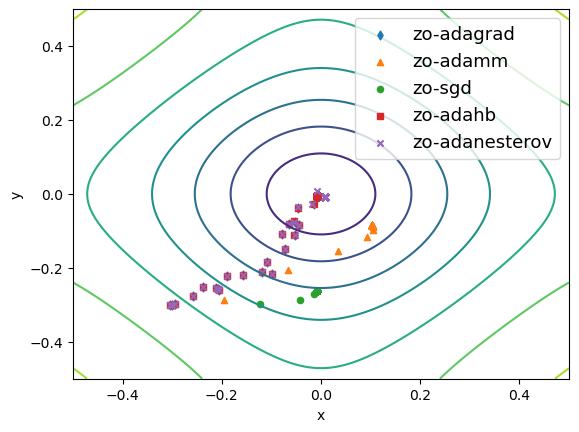

In [10]:
import numpy as np
import matplotlib.pyplot as plt
def ackley(x, y, a=20, b=0.2, c=2 * np.pi):  
    term1 = -a * np.exp(-b * np.sqrt((x**2 + y**2)/2))  
    term2 = -np.exp((np.cos(c*x) + np.cos(c*y))/2)  
    return term1 + term2 + a + np.exp(1)  

x_start, y_start = 0,0
x_history = [x_start]
y_history = [y_start]
z_history = [ackley(x_start, y_start)]

 
x = np.linspace(-0.5, 0.5, 1000)
y = np.linspace(-0.5, 0.5, 1000)
X, Y = np.meshgrid(x, y)
Z = ackley(X, Y)
fig = plt.figure()
cs = fig.add_subplot(111)
cs.contour(X, Y, Z)
cs.set_xlabel('x')
cs.set_ylabel('y')
cs.scatter(x_history, y_history, ackley(np.array(x_history), np.array(y_history)), c='red', marker='.')
plt.scatter(x_ada, y_ada,s=20,marker='d',label='zo-adagrad') 
plt.scatter(x_adamm, y_adamm,s=20,marker='^',label='zo-adamm') 
plt.scatter(x_sgd, y_sgd,s=20,marker='o',label='zo-sgd') 
plt.scatter(x_adahb, y_adahb,s=20,marker='s',label='zo-adahb') 
plt.scatter(x_adanesterov, y_adanesterov,s=20,marker='x',label='zo-adanesterov') 
plt.legend(fontsize=13)
plt.savefig('ackley_trajectory.png',dpi=300)
plt.show()

# Bukin

## ZO-AdaGrad

In [11]:
import torch  
import torch.nn as nn  
import torch.optim as optim  
from torchvision import datasets, transforms  
from tqdm import tqdm
import torch.nn.functional as F
from math import *
import numpy as np
def setup_seed(seed):
     torch.manual_seed(seed)
     torch.cuda.manual_seed_all(seed)
     torch.backends.cudnn.deterministic = True
setup_seed(20)
x_ada = []
y_ada = []
def bukin(param):
    x, y = param[0], param[1]
    return 100 * np.sqrt(np.abs(y - 0.01 * x * x)) + 0.01 * np.abs(x + 10)

def zeroth_order_optimize(num_iterations, mu=1, b=1,a=1):  
    param = torch.tensor([-15., -3.])
    g = 0
    last = 0
    for epoch in range(1, num_iterations + 1):  
        x_ada.append(param[0].item())
        y_ada.append(param[1].item())
        loss_list = []
        grad_estimates = {}  
        outputs_origin = bukin(param)
        print("Epoch ",epoch,":",outputs_origin.item())
        for i in range(100):
            u = torch.randn(2)
            u_norm = torch.norm(u)
            u = u / u_norm
            grad_estimate = torch.zeros_like(param)
            param_plus = param.clone()
            param_plus += u.view(param_plus.shape) * mu
            outputs_plus = bukin(param_plus)
            grad_i = (outputs_plus - outputs_origin)
            grad_estimate += grad_i * u.view(grad_estimate.shape)
        grad_estimates = (grad_estimate * 2 / 100 / mu)
        param -= a / sqrt(b + g) * grad_estimates
        g += torch.pow(torch.norm(grad_estimates),2)
        mu /= 2
 
    print(param, bukin(param).item())
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")    
num_iterations = 100
zeroth_order_optimize(num_iterations, mu=4,b=0.1,a=1.3)

Epoch  1 : 229.1787872314453
Epoch  2 : 225.62872314453125
Epoch  3 : 219.05870056152344
Epoch  4 : 198.19776916503906
Epoch  5 : 169.99830627441406
Epoch  6 : 169.2032470703125
Epoch  7 : 163.7047119140625
Epoch  8 : 158.09979248046875
Epoch  9 : 118.14923095703125
Epoch  10 : 114.62301635742188
Epoch  11 : 105.2383804321289
Epoch  12 : 104.9213638305664
Epoch  13 : 51.98075485229492
Epoch  14 : 103.71073150634766
Epoch  15 : 73.1553955078125
Epoch  16 : 72.63142395019531
Epoch  17 : 17.194293975830078
Epoch  18 : 16.942710876464844
Epoch  19 : 97.74102020263672
Epoch  20 : 79.4239273071289
Epoch  21 : 72.41619873046875
Epoch  22 : 31.812437057495117
Epoch  23 : 39.418792724609375
Epoch  24 : 34.660552978515625
Epoch  25 : 31.8614559173584
Epoch  26 : 7.2042388916015625
Epoch  27 : 7.2042388916015625
Epoch  28 : 7.2042388916015625
Epoch  29 : 7.2042388916015625
Epoch  30 : 7.2042388916015625
Epoch  31 : 7.2042388916015625
Epoch  32 : 7.2042388916015625
Epoch  33 : 7.2042388916015625
E

(tensor([-10.9916,   1.2133]), 7.2042388916015625)

## ZO-AdaMM

In [12]:
import torch  
import torch.nn as nn
import torch.optim as optim  
from torchvision import datasets, transforms  
from tqdm import tqdm
import torch.nn.functional as F

def setup_seed(seed):
     torch.manual_seed(seed)
     torch.cuda.manual_seed_all(seed)
     torch.backends.cudnn.deterministic = True
setup_seed(20)
x_adamm = []
y_adamm = []
def bukin(param):
    x, y = param[0], param[1]
    return 100 * np.sqrt(np.abs(y - 0.01 * x * x)) + 0.01 * np.abs(x + 10)
def zeroth_order_optimize(num_iterations, mu=1, lr=0.01, beta_1=0.9, beta_2=0.3, v_init=1e-1):  
    param = torch.tensor([-15., -3.])
    m = torch.zeros(param.shape)
    v = torch.ones(param.shape) * v_init
    v_hat = torch.ones(param.shape) * v_init
    last = 0
    for epoch in range(1, num_iterations + 1):  
        x_adamm.append(param[0].item())
        y_adamm.append(param[1].item())
        loss_list = []
        grad_estimates = {}  
        outputs_origin = bukin(param)
        print("Epoch ",epoch,":",outputs_origin.item())
        for i in range(100):
            u = torch.randn(2)
            u_norm = torch.norm(u)
            u = u / u_norm
            grad_estimate = torch.zeros_like(param)
            param_plus = param.clone()
            param_plus += u.view(param_plus.shape) * mu
            outputs_plus = bukin(param_plus)
            grad_i = (outputs_plus - outputs_origin)
            grad_estimate += grad_i * u.view(grad_estimate.shape)
        grad_estimates = (grad_estimate * 2 / 100 / mu)
        g_k = grad_estimates
        v = beta_2 * v + (1-beta_2) * torch.square(g_k)
        m = beta_1 * m + (1-beta_1) * g_k
        v_hat = torch.maximum(v_hat,v)
        param -= lr * m / torch.sqrt(v_hat) 
        mu /= 2

    return param, bukin(param).item()
    
        
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")    
num_iterations = 100
zeroth_order_optimize(num_iterations, mu=3, lr=1, beta_1=0.8, beta_2=0.2, v_init=1)

Epoch  1 : 229.1787872314453
Epoch  2 : 229.00067138671875
Epoch  3 : 228.50677490234375
Epoch  4 : 226.959228515625
Epoch  5 : 223.9723358154297
Epoch  6 : 221.4718780517578
Epoch  7 : 219.17796325683594
Epoch  8 : 217.03103637695312
Epoch  9 : 212.98257446289062
Epoch  10 : 209.45924377441406
Epoch  11 : 206.0561065673828
Epoch  12 : 203.25543212890625
Epoch  13 : 199.23251342773438
Epoch  14 : 193.8628387451172
Epoch  15 : 186.9448699951172
Epoch  16 : 181.13973999023438
Epoch  17 : 174.18870544433594
Epoch  18 : 168.398193359375
Epoch  19 : 162.56106567382812
Epoch  20 : 153.30343627929688
Epoch  21 : 143.9782257080078
Epoch  22 : 130.25457763671875
Epoch  23 : 117.23345184326172
Epoch  24 : 104.94227600097656
Epoch  25 : 93.95902252197266
Epoch  26 : 84.1466064453125
Epoch  27 : 75.38253784179688
Epoch  28 : 67.55741882324219
Epoch  29 : 60.573577880859375
Epoch  30 : 54.34379959106445
Epoch  31 : 48.79026412963867
Epoch  32 : 43.84348678588867
Epoch  33 : 39.44148254394531
Epoch 

(tensor([-13.6470,   1.8536]), 9.395434379577637)

## ZO-SGD

In [13]:
import torch  
import torch.nn as nn  
import torch.optim as optim  
from torchvision import datasets, transforms  
from tqdm import tqdm
import torch.nn.functional as F
from math import *
def setup_seed(seed):
     torch.manual_seed(seed)
     torch.cuda.manual_seed_all(seed)
     torch.backends.cudnn.deterministic = True
setup_seed(20)
x_sgd = []
y_sgd = []
def bukin(param):
    x, y = param[0], param[1]
    return 100 * np.sqrt(np.abs(y - 0.01 * x * x)) + 0.01 * np.abs(x + 10)
def zeroth_order_optimize(num_iterations, mu=1, lr=0.01):  
    param = torch.tensor([-15., -3.])
    for epoch in range(1, num_iterations + 1):  
        x_sgd.append(param[0].item())
        y_sgd.append(param[1].item())
        loss_list = []
        grad_estimates = {}  
        outputs_origin = bukin(param)
        print(outputs_origin.item())
        for i in range(100):
            u = torch.randn(2)
            u_norm = torch.norm(u)
            u = u / u_norm
            grad_estimate = torch.zeros_like(param)
            param_plus = param.clone()
            param_plus += u.view(param_plus.shape) * mu
            outputs_plus = bukin(param_plus)
            grad_i = (outputs_plus - outputs_origin)
            grad_estimate += grad_i * u.view(grad_estimate.shape)
        grad_estimates = (grad_estimate * 2 / 100 / mu)
        param -= lr * grad_estimates  
        mu /= 2
        
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")    
num_iterations = 100
zeroth_order_optimize(num_iterations, mu=5, lr=1)

229.1787872314453
228.3300018310547
226.58335876464844
220.644775390625
211.5203399658203
211.080322265625
209.49856567382812
207.85166931152344
195.0102996826172
193.69943237304688
190.63121032714844
190.42111206054688
180.2303466796875
167.37364196777344
150.03756713867188
149.45909118652344
132.89578247070312
132.6973419189453
123.95683288574219
82.22055053710938
53.88767623901367
125.45769500732422
118.69574737548828
118.69574737548828
93.2741470336914
78.51685333251953
78.51685333251953
78.51685333251953
78.51685333251953
78.51685333251953
78.51685333251953
78.51685333251953
78.51685333251953
78.51685333251953
78.51685333251953
78.51685333251953
78.51685333251953
78.51685333251953
78.51685333251953
78.51685333251953
78.51685333251953
78.51685333251953
78.51685333251953
78.51685333251953
78.51685333251953
78.51685333251953
78.51685333251953
78.51685333251953
78.51685333251953
78.51685333251953
78.51685333251953
78.51685333251953
78.51685333251953
78.51685333251953
78.51685333251953

## ZO-AdaHB

In [14]:
import torch  
import torch.nn as nn  
import torch.optim as optim  
from torchvision import datasets, transforms  
from tqdm import tqdm
import torch.nn.functional as F
from math import *
def setup_seed(seed):
     torch.manual_seed(seed)
     torch.cuda.manual_seed_all(seed)
     torch.backends.cudnn.deterministic = True
setup_seed(20)
x_adahb = []
y_adahb = []
def bukin(param):
    x, y = param[0], param[1]
    return 100 * np.sqrt(np.abs(y - 0.01 * x * x)) + 0.01 * np.abs(x + 10)
def zeroth_order_optimize(num_iterations, mu=1, lr=0.01, theta=0.4):  
    param = torch.tensor([-15.,-3.])
    g = 0
    b = 0.1
    last = torch.tensor([0.,0.])
    for epoch in range(1, num_iterations + 1):  
        x_adahb.append(param[0].item())
        y_adahb.append(param[1].item())
        loss_list = []
        grad_estimates = {}  
        outputs_origin = bukin(param)
        print("Epoch ",epoch,":",outputs_origin.item())
        for i in range(100):
            u = torch.randn(2)
            u_norm = torch.norm(u)
            u = u / u_norm
            grad_estimate = torch.zeros_like(param)
            param_plus = param.clone()
            param_plus += u.view(param_plus.shape) * mu
            outputs_plus = bukin(param_plus)
            grad_i = (outputs_plus - outputs_origin)
            grad_estimate += grad_i * u.view(grad_estimate.shape)
        grad_estimates = (grad_estimate * 2 / 100 / mu)
        tmp = param.clone()
        param -= 1.3 / sqrt(b + g) * grad_estimates + theta * last

        last = param - tmp
        g += torch.pow(torch.norm(grad_estimates),2)
        mu /= 2
    print(param)
        
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")    
num_iterations = 100
zeroth_order_optimize(num_iterations, mu=4, lr=0.1, theta=1e-4)

Epoch  1 : 229.1787872314453
Epoch  2 : 225.62872314453125
Epoch  3 : 219.0590362548828
Epoch  4 : 198.19883728027344
Epoch  5 : 170.00210571289062
Epoch  6 : 169.21005249023438
Epoch  7 : 163.712158203125
Epoch  8 : 158.1082000732422
Epoch  9 : 118.16291809082031
Epoch  10 : 114.64239501953125
Epoch  11 : 105.26190185546875
Epoch  12 : 104.9461898803711
Epoch  13 : 52.04153823852539
Epoch  14 : 103.60838317871094
Epoch  15 : 72.93671417236328
Epoch  16 : 72.41690063476562
Epoch  17 : 18.31018829345703
Epoch  18 : 18.072429656982422
Epoch  19 : 94.38174438476562
Epoch  20 : 73.93901062011719
Epoch  21 : 65.08557891845703
Epoch  22 : 24.948680877685547
Epoch  23 : 51.305240631103516
Epoch  24 : 51.302093505859375
Epoch  25 : 30.863924026489258
Epoch  26 : 6.524083614349365
Epoch  27 : 6.516380786895752
Epoch  28 : 6.516380786895752
Epoch  29 : 6.516380786895752
Epoch  30 : 6.516380786895752
Epoch  31 : 6.516380786895752
Epoch  32 : 6.516380786895752
Epoch  33 : 6.516380786895752
Epoch  

## ZO-AdaNesterov

In [15]:
import torch  
import torch.nn as nn  
import torch.optim as optim  
from torchvision import datasets, transforms  
from tqdm import tqdm
import torch.nn.functional as F
from math import *
def setup_seed(seed):
     torch.manual_seed(seed)
     torch.cuda.manual_seed_all(seed)
     torch.backends.cudnn.deterministic = True
setup_seed(20)
x_adanesterov = []
y_adanesterov = []
def bukin(param):
    x, y = param[0], param[1]
    return 100 * np.sqrt(np.abs(y - 0.01 * x * x)) + 0.01 * np.abs(x + 10)
def zeroth_order_optimize(num_iterations, mu=1, lr=0.01, theta=0.4):  
    param = torch.tensor([-15.,-3.])
    g = 0
    b = 0.1
    last = torch.tensor([0.,0.])
    for epoch in range(1, num_iterations + 1):  
        x_adanesterov.append(param[0].item())
        y_adanesterov.append(param[1].item())
        loss_list = []
        lr = lr / epoch
        grad_estimates = {}  
        outputs_origin = bukin(param + theta * last)
        print("Epoch ",epoch,":",outputs_origin.item())
        for i in range(100):
            u = torch.randn(2)
            u_norm = torch.norm(u)
            u = u / u_norm
            grad_estimate = torch.zeros_like(param)
            param_plus = param.clone()
            param_plus += u.view(param_plus.shape) * mu
            outputs_plus = bukin(param_plus + theta * last)
            grad_i = (outputs_plus - outputs_origin)
            grad_estimate += grad_i * u.view(grad_estimate.shape)
        grad_estimates = (grad_estimate * 2 / 100 / mu)
        tmp = param.clone()
        param -= 1.3 / sqrt(b + g) * grad_estimates

        last = param - tmp
        g += torch.pow(torch.norm(grad_estimates),2)
        mu /= 2
    print(param)
        
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")    
num_iterations = 100
zeroth_order_optimize(num_iterations, mu=4, lr=2, theta=1e-5)

Epoch  1 : 229.1787872314453
Epoch  2 : 225.62867736816406
Epoch  3 : 219.05862426757812
Epoch  4 : 198.19760131835938
Epoch  5 : 169.99801635742188
Epoch  6 : 169.2032470703125
Epoch  7 : 163.70457458496094
Epoch  8 : 158.09954833984375
Epoch  9 : 118.14867401123047
Epoch  10 : 114.62289428710938
Epoch  11 : 105.23820495605469
Epoch  12 : 104.92144775390625
Epoch  13 : 51.9649772644043
Epoch  14 : 103.73880767822266
Epoch  15 : 73.20308685302734
Epoch  16 : 72.67996215820312
Epoch  17 : 16.780466079711914
Epoch  18 : 16.514644622802734
Epoch  19 : 99.09844207763672
Epoch  20 : 81.77899169921875
Epoch  21 : 75.29318237304688
Epoch  22 : 44.24386978149414
Epoch  23 : 10.982880592346191
Epoch  24 : 34.61346435546875
Epoch  25 : 29.25543785095215
Epoch  26 : 9.322226524353027
Epoch  27 : 9.321715354919434
Epoch  28 : 9.321715354919434
Epoch  29 : 9.321715354919434
Epoch  30 : 9.321715354919434
Epoch  31 : 9.321715354919434
Epoch  32 : 9.321715354919434
Epoch  33 : 9.321715354919434
Epoch 

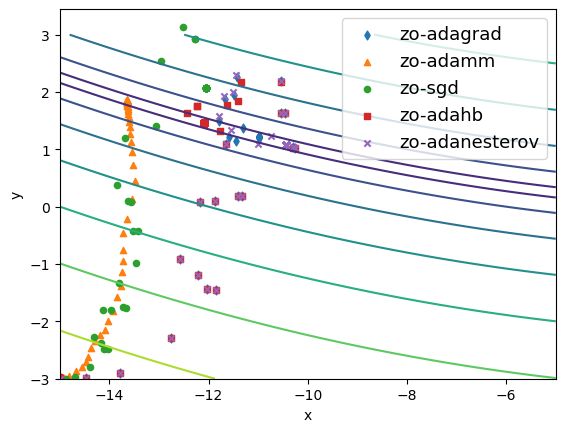

In [17]:
import numpy as np
import matplotlib.pyplot as plt
def bukin(param):
    x, y = param[0], param[1]
    return 100 * np.sqrt(np.abs(y - 0.01 * x * x)) + 0.01 * np.abs(x + 10)

x_start, y_start = -15,-3
x_history = [x_start]
y_history = [y_start]
z_history = [bukin([x_start, y_start])]
x = np.linspace(-15, -5, 1000)
y = np.linspace(-3, 3, 1000)
X, Y = np.meshgrid(x, y)
Z = bukin([X, Y])
fig = plt.figure()
cs = fig.add_subplot(111)
cs.contour(X, Y, Z)
cs.set_xlabel('x')
cs.set_ylabel('y')
cs.scatter(x_history, y_history, bukin([np.array(x_history), np.array(y_history)]), c='red', marker='.')
plt.scatter(x_ada, y_ada,s=20,marker='d',label='zo-adagrad') 
plt.scatter(x_adamm, y_adamm,s=20,marker='^',label='zo-adamm') 
plt.scatter(x_sgd, y_sgd,s=20,marker='o',label='zo-sgd') 
plt.scatter(x_adahb, y_adahb,s=20,marker='s',label='zo-adahb') 
plt.scatter(x_adanesterov, y_adanesterov,s=20,marker='x',label='zo-adanesterov') 
plt.legend(fontsize=13)
plt.savefig('bukin_trajectory.png',dpi=300)
plt.show()